# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio




Objetivo do Projeto:

- Criar um modelo que preveja a renda de um cliente com base em suas características.
- Esse modelo pode ser usado para oferecer produtos financeiros, ajustar limites de crédito, entre outros.

De modo que utilizadores do modelo possam:
- Melhorar a segmentação de clientes.
- Otimizar a concessão de crédito.
- Reduzir os riscos de inadimplência.

Sendo assim seguiremos da presunção de que esses fatores podem influenciar na renda de uma pessoa:
- Idade, escolaridade, ocupação.
- Histórico financeiro, dívidas.
- Localização, estado civil.

Utilizando os fatores que estejam presentes no dataset utilizado.

## Etapa 2 Crisp-DM: Entendimento dos dados







#### Carregando os pacotes


In [1]:
%matplotlib inline 
#deixar plt.show aparecer no vscode#

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport


#### Carregando os dados

In [3]:
df = pd.read_csv("./input/previsao_de_renda.csv")
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [4]:
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de obtenção dos dados do cliente                                      | object|
| id_cliente              |  ID do cliente                                      | int64|
| sexo                    |  Sexo do cliente, F - feminino; M - masculino                                      |object|
| posse_de_veiculo        |  Se o cliente possui veiculo, True - possui; False - não possui  | bool|
| posse_de_imovel         |  Se o cliente possui imovel, True - possui; False - não possui|bool|
| qtd_filhos              |  Numero de filhos do cliente                                      | int64I|
| tipo_renda              |  Tipo de renda (ex: Assalariado, Servidor Público, Empresário)                                      | object|
| educacao                |  Nível de escolaridade                              | object|
| estado_civil            |  Estado civil                                     | object|
| tipo_residencia         |  Tipo de residencia (ex: Casa, Aluguel, Estúdio)                                  | object|
| idade                   |  Idade do cliente                                    | int64|
| tempo_emprego           |  Tempo de emprego em anos                                      | Float64|
| qt_pessoas_residencia   |  Quantidade de pessoas morando com o cliente                                     | float64|
| renda                   |  Variavel alvo, renda do cliente                                     | float64|



#### Entendimento dos dados - Univariada

In [5]:
prof = ProfileReport(df, explorative = True, minimal = True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/Analise_renda.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Olhando agora para a destribuição da variavel 'renda' (variavel alvo):

In [7]:
df["renda"].describe()

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

Criação de histograma para melhor visualização:

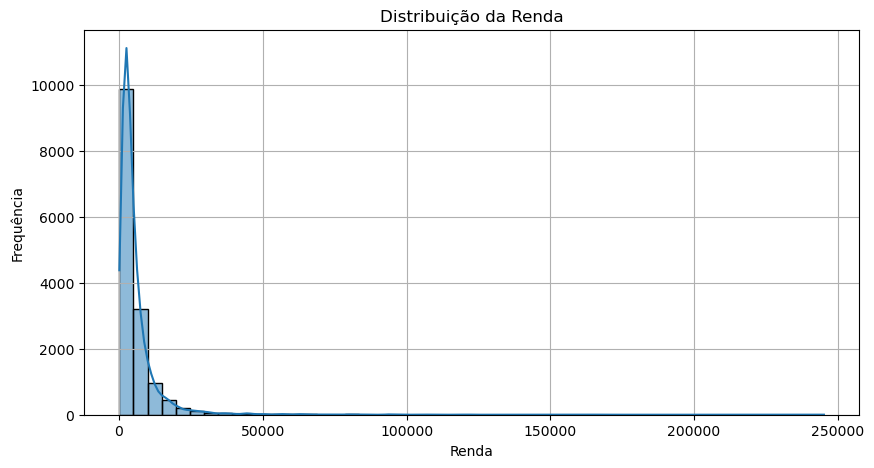

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df["renda"], bins=50, kde=True)
plt.title("Distribuição da Renda")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.grid()
plt.show()

### Entendimento dos dados - Bivariadas




##### Análise Bivariada entre Variáveis Categóricas e a Variável Alvo (renda):

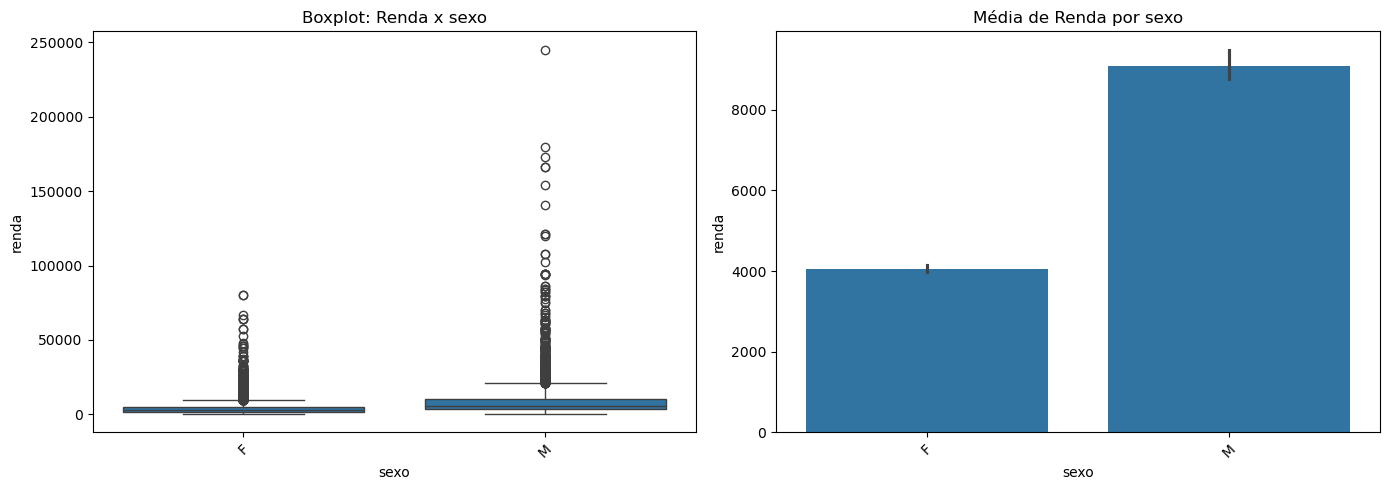

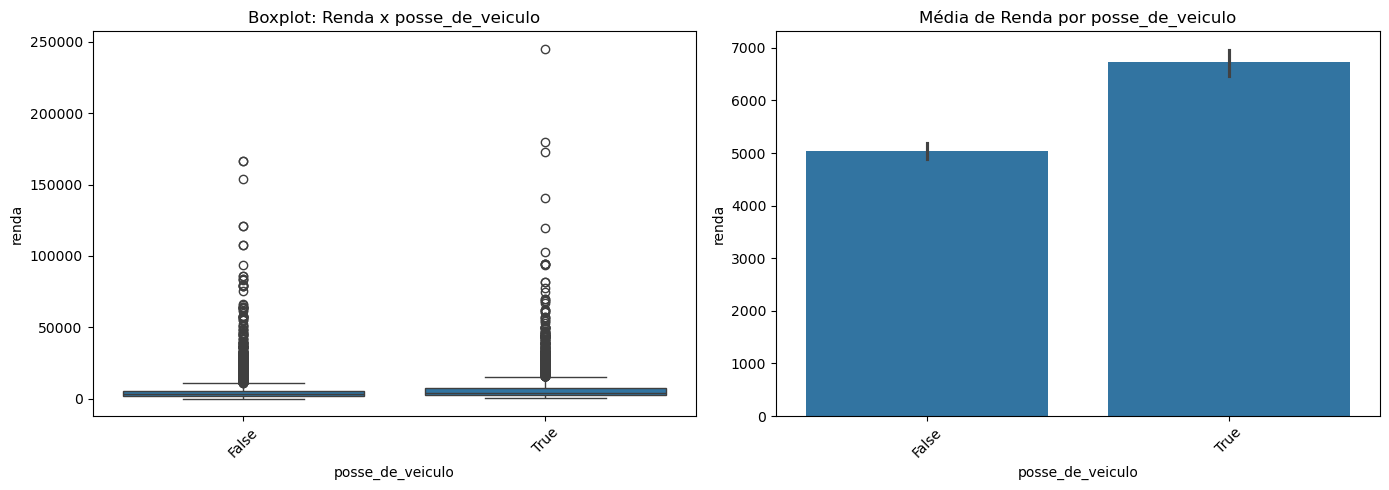

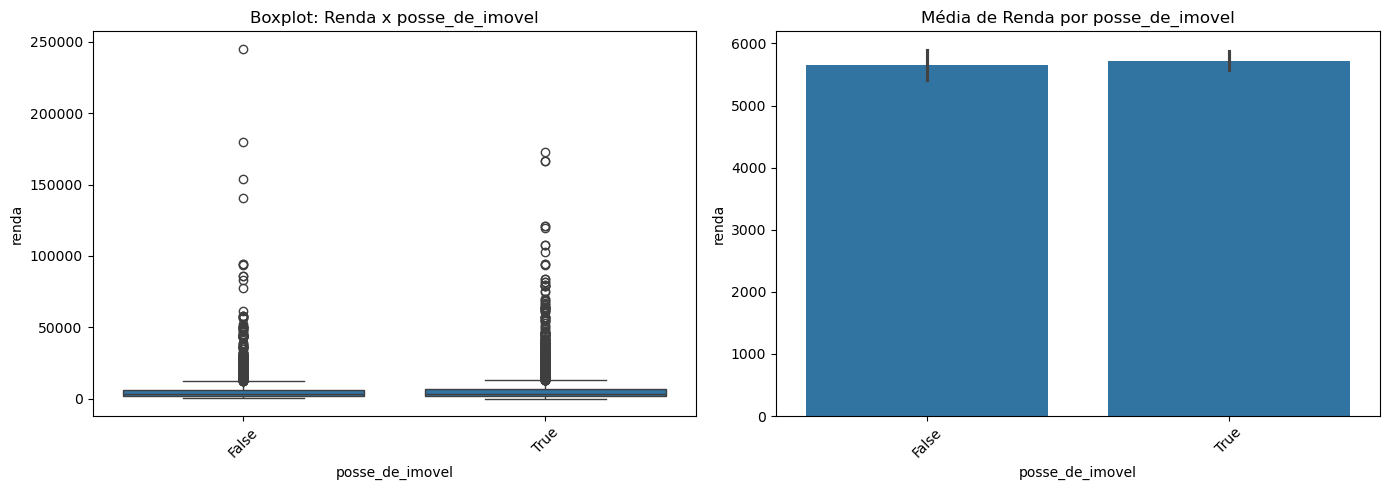

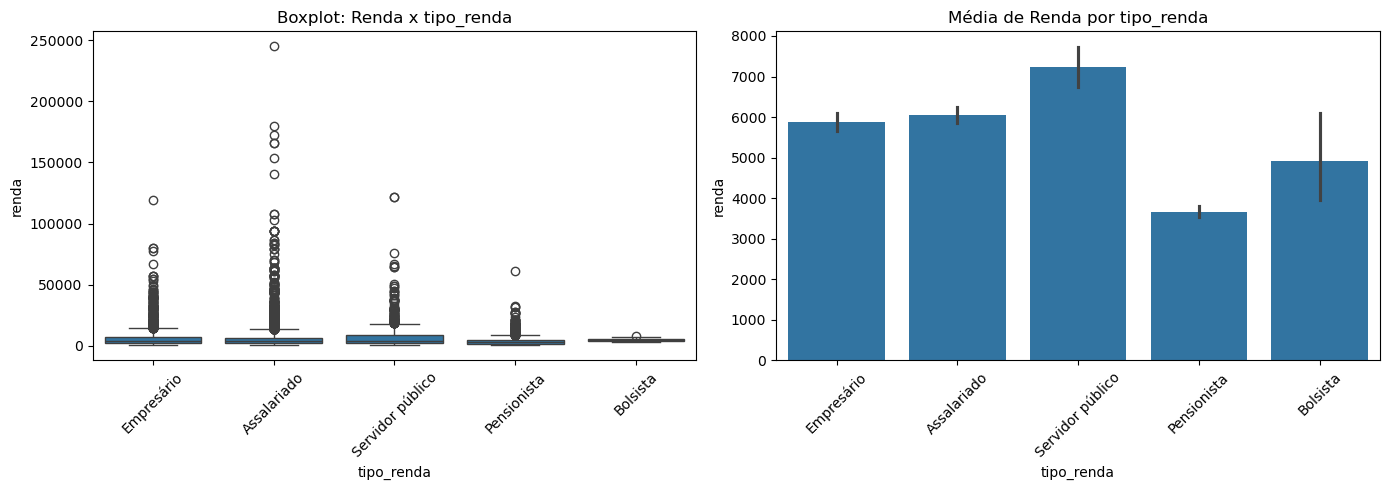

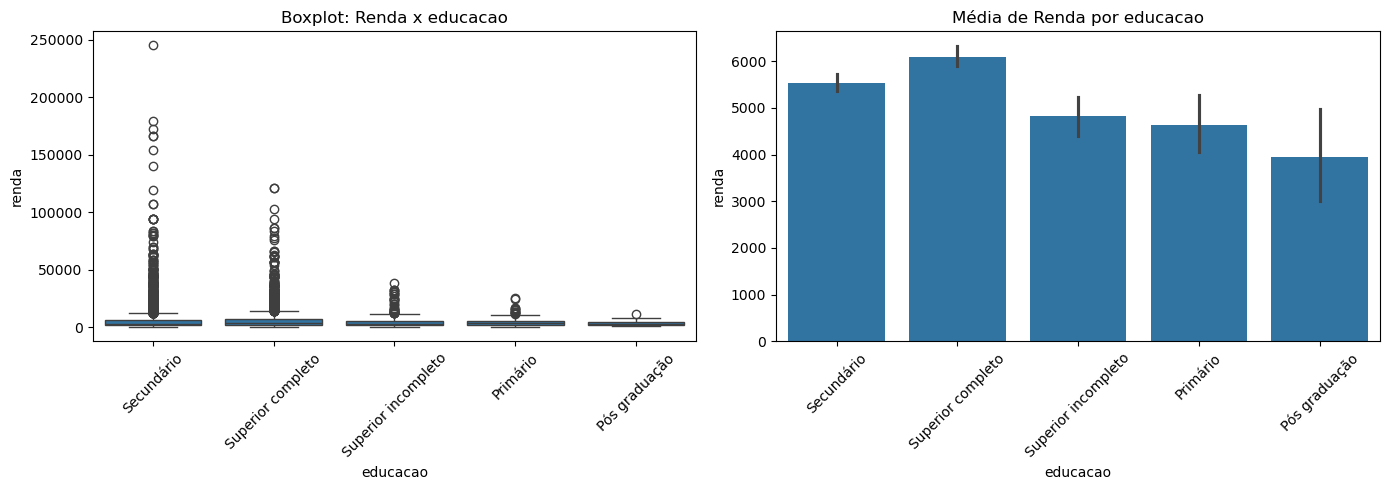

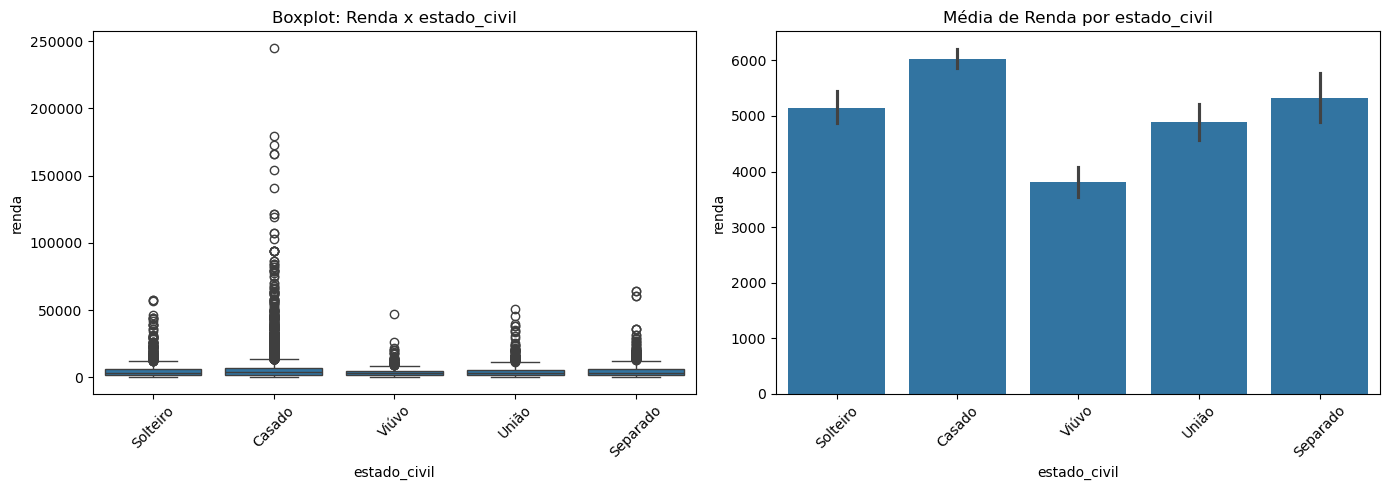

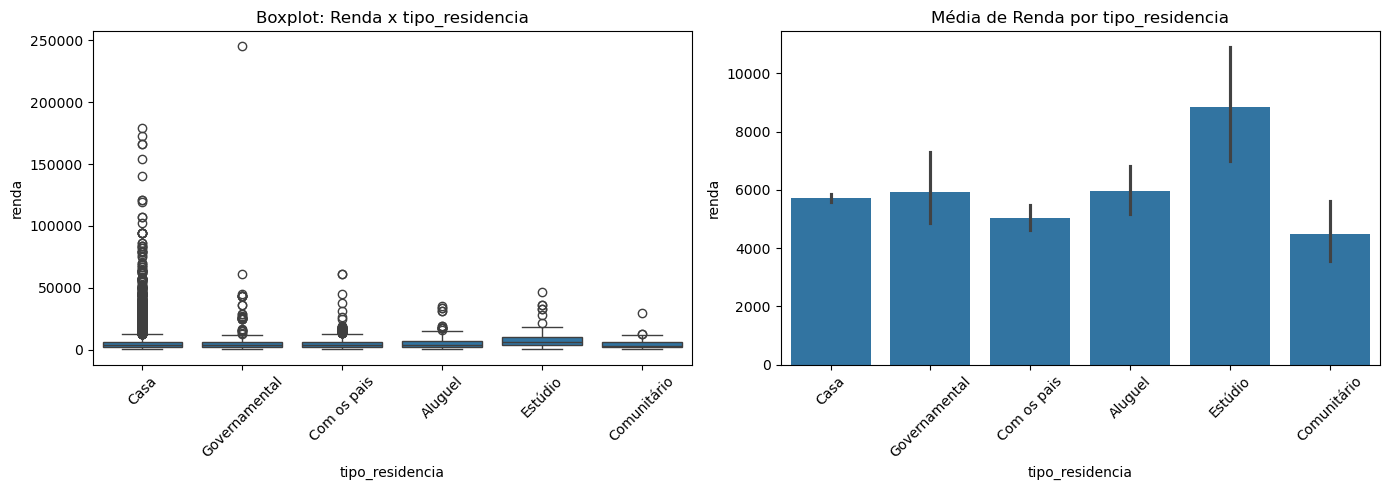

In [9]:
vars_categoricas = ["sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"]

for var in vars_categoricas:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(x= var, y='renda', data=df, ax=axes[0] )
    axes[0].set_title(f"Boxplot: Renda x {var }")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=var , y='renda', data=df, estimator=np.mean, ax=axes[1])
    axes[1].set_title(f"Média de Renda por {var}")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


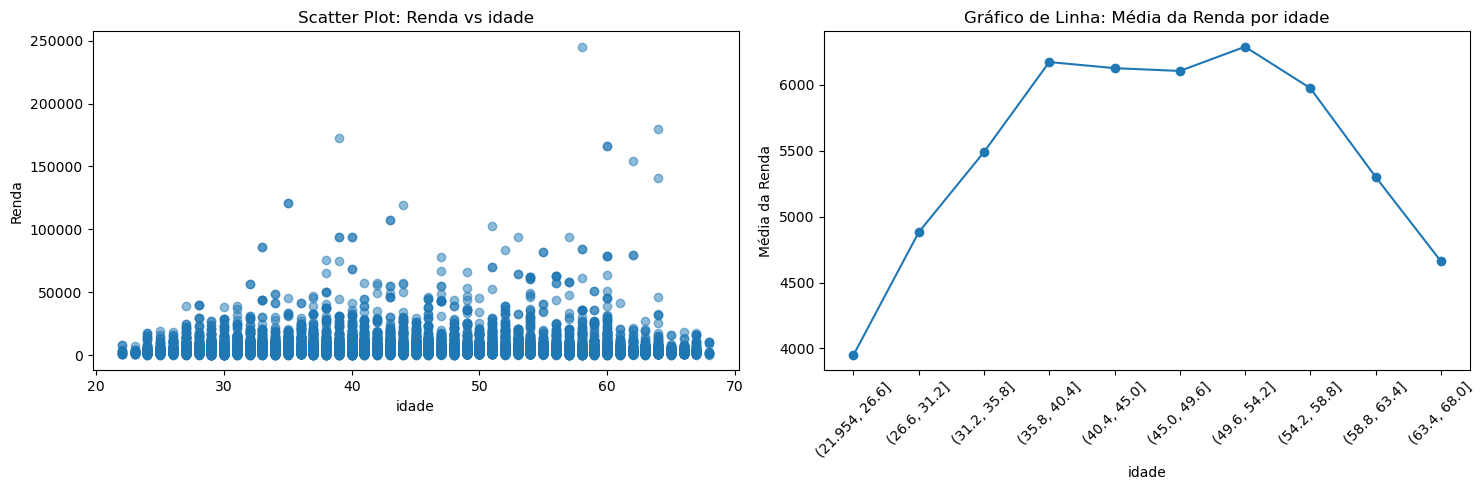

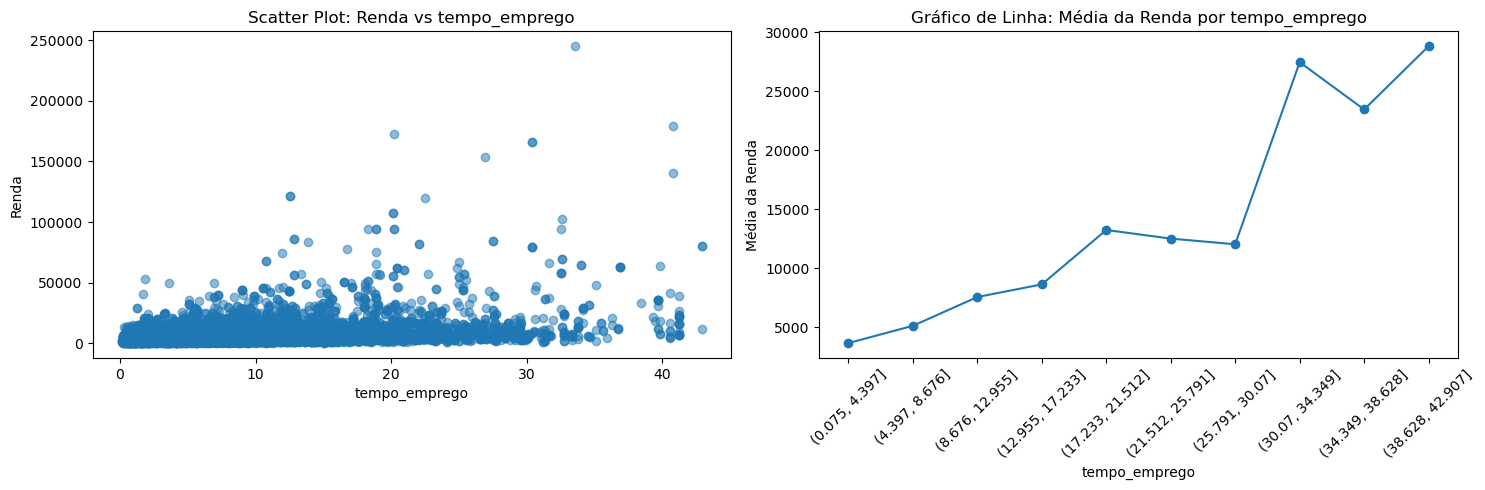

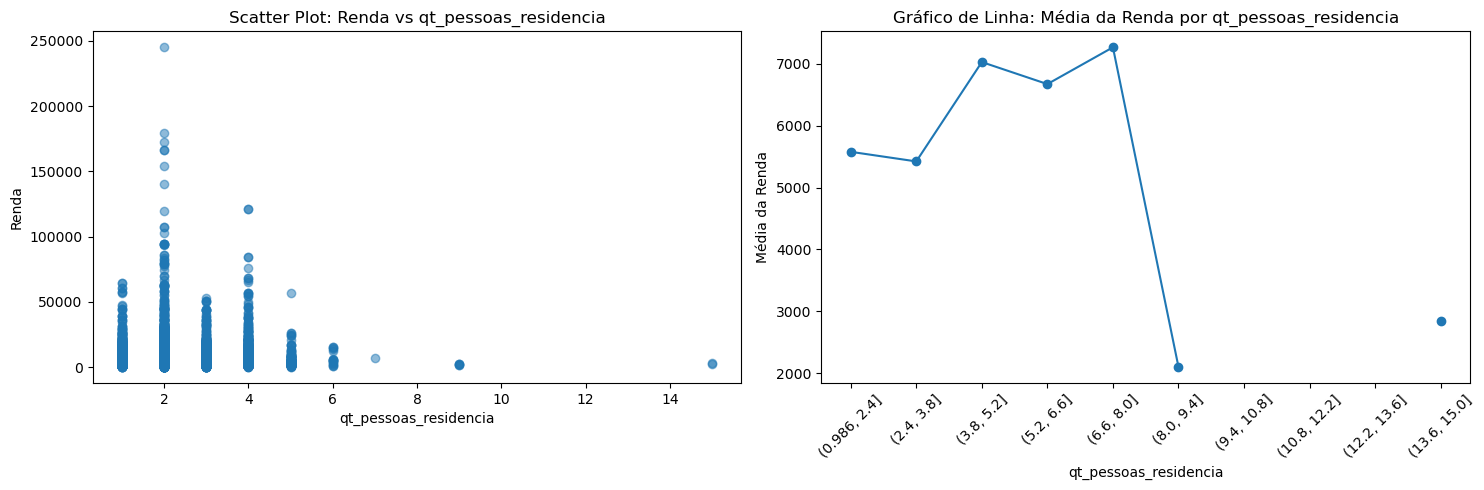

In [11]:
num_vars = ["idade", "tempo_emprego", "qt_pessoas_residencia"]


for var in num_vars:
    # Cria uma figura com dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter Plot
    ax1.scatter(df[var], df['renda'], alpha=0.5)
    ax1.set_xlabel(var)
    ax1.set_ylabel("Renda")
    ax1.set_title(f"Scatter Plot: Renda vs {var}")
    
    # Gráfico de Linha (média da renda por intervalo da variável)
    df['bins'] = pd.cut(df[var], bins=10)  # Divide a variável em 10 intervalos
    biv = df.groupby('bins', observed=False)['renda'].mean()  # Calcula a média da renda por intervalo
    ax2.plot(biv.index.astype(str), biv.values, marker='o')
    ax2.set_xlabel(var)
    ax2.set_ylabel("Média da Renda")
    ax2.set_title(f"Gráfico de Linha: Média da Renda por {var}")
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
    
    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.